<a href="https://colab.research.google.com/github/Karla-Flores/Neural-Network--Charity-Donation/blob/main/Starter_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving charity_data.csv to charity_data.csv


In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
# application_df = pd.read_csv("../Resources/charity_data.csv")
application_df = pd.read_csv('charity_data.csv')
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
application_df.shape

(34299, 12)

In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN','NAME'],axis=1)
application_df.shape

(34299, 10)

In [ ]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [ ]:
# Look at APPLICATION_TYPE value counts for binning
application_value = application_df.loc[:, 'APPLICATION_TYPE'].value_counts()
application_value

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
classification_value = application_df.loc[:, 'CLASSIFICATION'].value_counts()
classification_value

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1820        1
C4500        1
C1248        1
C1283        1
C4200        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_value[application_value<200].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

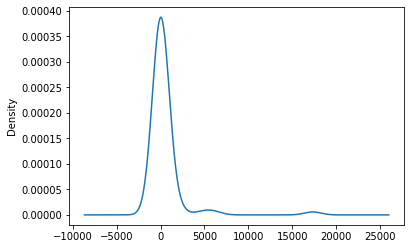

In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_value.plot(kind='density')

In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_value[classification_value<1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [ ]:
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df, dtype=float)
application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
application_df.dtypes

STATUS                            int64
ASK_AMT                           int64
IS_SUCCESSFUL                     int64
APPLICATION_TYPE_Other          float64
APPLICATION_TYPE_T10            float64
APPLICATION_TYPE_T19            float64
APPLICATION_TYPE_T3             float64
APPLICATION_TYPE_T4             float64
APPLICATION_TYPE_T5             float64
APPLICATION_TYPE_T6             float64
APPLICATION_TYPE_T7             float64
APPLICATION_TYPE_T8             float64
AFFILIATION_CompanySponsored    float64
AFFILIATION_Family/Parent       float64
AFFILIATION_Independent         float64
AFFILIATION_National            float64
AFFILIATION_Other               float64
AFFILIATION_Regional            float64
CLASSIFICATION_C1000            float64
CLASSIFICATION_C1200            float64
CLASSIFICATION_C2000            float64
CLASSIFICATION_C2100            float64
CLASSIFICATION_C3000            float64
CLASSIFICATION_Other            float64
USE_CASE_CommunityServ          float64


In [ ]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop('IS_SUCCESSFUL', axis=1).values

# Split the preprocessed data into a training and
# testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 42)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
X_train.shape

(25724, 43)

## Compile, Train and Evaluate the Model

In [ ]:
X_train

array([[1.e+00, 5.e+03, 0.e+00, ..., 0.e+00, 1.e+00, 0.e+00],
       [1.e+00, 5.e+03, 0.e+00, ..., 0.e+00, 1.e+00, 0.e+00],
       [1.e+00, 5.e+03, 0.e+00, ..., 0.e+00, 1.e+00, 0.e+00],
       ...,
       [1.e+00, 5.e+03, 0.e+00, ..., 0.e+00, 1.e+00, 0.e+00],
       [1.e+00, 5.e+03, 0.e+00, ..., 0.e+00, 1.e+00, 0.e+00],
       [1.e+00, 5.e+03, 0.e+00, ..., 0.e+00, 1.e+00, 0.e+00]])

In [ ]:
len(X_train[0])

43

In [ ]:
len(X_train_scaled[0])

43

# Model Evaluation 1

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=80
hidden_nodes_layer2=30

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy', tf.keras.metrics.Recall()])

In [ ]:
fit_model = nn_model.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5373 - accuracy: 0.7382 - recall_1: 0.7930 - val_loss: 0.5305 - val_accuracy: 0.7422 - val_recall_1: 0.7715
Epoch 2/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5378 - accuracy: 0.7379 - recall_1: 0.7945 - val_loss: 0.5306 - val_accuracy: 0.7432 - val_recall_1: 0.7730
Epoch 3/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5372 - accuracy: 0.7388 - recall_1: 0.7956 - val_loss: 0.5325 - val_accuracy: 0.7401 - val_recall_1: 0.7715
Epoch 4/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5367 - accuracy: 0.7386 - recall_1: 0.7950 - val_loss: 0.5330 - val_accuracy: 0.7406 - val_recall_1: 0.7765
Epoch 5/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5368 - accuracy: 0.7383 - recall_1: 0.7954 - val_loss: 0.5328 - val_accuracy: 0.7409 - val_recall_1: 0.7760
Epoch 6/100
684/684 [==============================] - 1s 2ms/step - loss: 

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy, model_Recall= nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5713 - accuracy: 0.7293 - recall_1: 0.7822
Loss: 0.5713241100311279, Accuracy: 0.7293294668197632


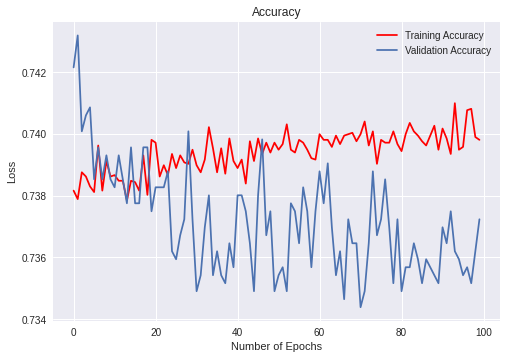

In [ ]:
# Model Accuracy Graph
plt.style.use("seaborn")
plt.title("Accuracy")
plt.plot(fit_model.history["accuracy"], "r", label="Training Accuracy")
plt.plot(fit_model.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

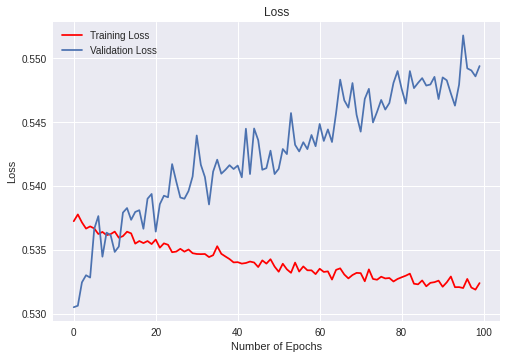

In [ ]:
# Model Loss Graph
plt.style.use("seaborn")
plt.title("Loss")
plt.plot(fit_model.history["loss"], "r", label="Training Loss")
plt.plot(fit_model.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Export our model to HDF5 file
from google.colab import files

nn_model.save('/content/Alphabet_Soup_model1.h5')
files.download('/content/Alphabet_Soup_model1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model Evaluation 2

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=1450
hidden_nodes_layer2=80

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 1450)              63800     
_________________________________________________________________
dense_105 (Dense)            (None, 80)                116080    
_________________________________________________________________
dense_106 (Dense)            (None, 1)                 81        
Total params: 179,961
Trainable params: 179,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy', tf.keras.metrics.Recall()])

In [ ]:
fit_model = nn_model.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
684/684 [==============================] - 3s 4ms/step - loss: 0.5693 - accuracy: 0.7207 - recall_28: 0.7796 - val_loss: 0.5567 - val_accuracy: 0.7346 - val_recall_28: 0.7944
Epoch 2/100
684/684 [==============================] - 2s 3ms/step - loss: 0.5582 - accuracy: 0.7271 - recall_28: 0.7800 - val_loss: 0.5545 - val_accuracy: 0.7334 - val_recall_28: 0.7541
Epoch 3/100
684/684 [==============================] - 2s 3ms/step - loss: 0.5536 - accuracy: 0.7305 - recall_28: 0.7839 - val_loss: 0.5479 - val_accuracy: 0.7352 - val_recall_28: 0.7830
Epoch 4/100
684/684 [==============================] - 2s 3ms/step - loss: 0.5537 - accuracy: 0.7298 - recall_28: 0.7917 - val_loss: 0.5504 - val_accuracy: 0.7346 - val_recall_28: 0.7914
Epoch 5/100
684/684 [==============================] - 2s 3ms/step - loss: 0.5516 - accuracy: 0.7328 - recall_28: 0.8024 - val_loss: 0.5477 - val_accuracy: 0.7352 - val_recall_28: 0.7775
Epoch 6/100
684/684 [==============================] - 2s 3ms/ste

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy, model_Recall= nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5751 - accuracy: 0.7307 - recall_28: 0.8045
Loss: 0.5750879645347595, Accuracy: 0.7307288646697998


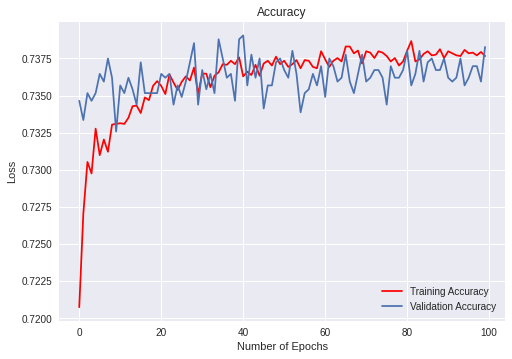

In [ ]:
# Model Accuracy Graph
plt.style.use("seaborn")
plt.title("Accuracy")
plt.plot(fit_model.history["accuracy"], "r", label="Training Accuracy")
plt.plot(fit_model.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

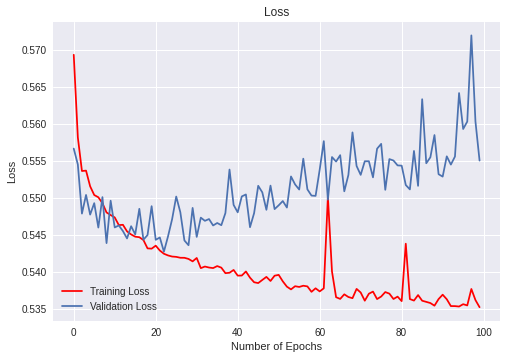

In [ ]:
# Model Loss Graph
plt.style.use("seaborn")
plt.title("Loss")
plt.plot(fit_model.history["loss"], "r", label="Training Loss")
plt.plot(fit_model.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Export our model to HDF5 file
from google.colab import files

nn_model.save('/content/Alphabet_Soup_model2.h5')
files.download('/content/Alphabet_Soup_model2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model Evaluation 3

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=3
hidden_nodes_layer2=16
hidden_nodes_layer3=3

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model.summary()

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_235 (Dense)            (None, 3)                 132       
_________________________________________________________________
dense_236 (Dense)            (None, 16)                64        
_________________________________________________________________
dense_237 (Dense)            (None, 3)                 51        
_________________________________________________________________
dense_238 (Dense)            (None, 1)                 4         
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy', tf.keras.metrics.Recall()])

In [ ]:
fit_model = nn_model.fit( X_train_scaled,y_train,validation_split=0.15,epochs=100)

Epoch 1/100
684/684 [==============================] - 3s 3ms/step - loss: 0.6770 - accuracy: 0.5923 - recall_58: 0.8395 - val_loss: 0.6288 - val_accuracy: 0.7046 - val_recall_58: 0.7183
Epoch 2/100
684/684 [==============================] - 2s 3ms/step - loss: 0.6033 - accuracy: 0.7105 - recall_58: 0.7757 - val_loss: 0.5801 - val_accuracy: 0.7295 - val_recall_58: 0.7780
Epoch 3/100
684/684 [==============================] - 2s 3ms/step - loss: 0.5803 - accuracy: 0.7206 - recall_58: 0.7954 - val_loss: 0.5690 - val_accuracy: 0.7292 - val_recall_58: 0.7745
Epoch 4/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5730 - accuracy: 0.7226 - recall_58: 0.7944 - val_loss: 0.5654 - val_accuracy: 0.7253 - val_recall_58: 0.7994
Epoch 5/100
684/684 [==============================] - 2s 3ms/step - loss: 0.5698 - accuracy: 0.7234 - recall_58: 0.7920 - val_loss: 0.5617 - val_accuracy: 0.7284 - val_recall_58: 0.7461
Epoch 6/100
684/684 [==============================] - 2s 3ms/ste

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy, model_Recall= nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5564 - accuracy: 0.7283 - recall_58: 0.7791
Loss: 0.5563523173332214, Accuracy: 0.7282798886299133


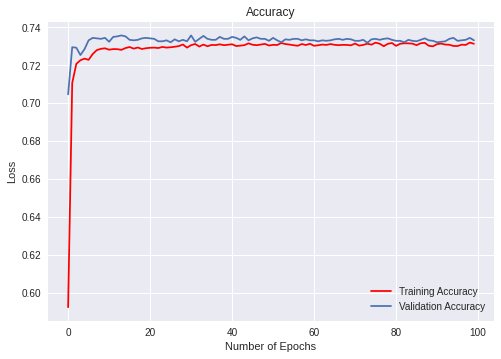

In [ ]:
# Model Accuracy Graph
plt.style.use("seaborn")
plt.title("Accuracy")
plt.plot(fit_model.history["accuracy"], "r", label="Training Accuracy")
plt.plot(fit_model.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

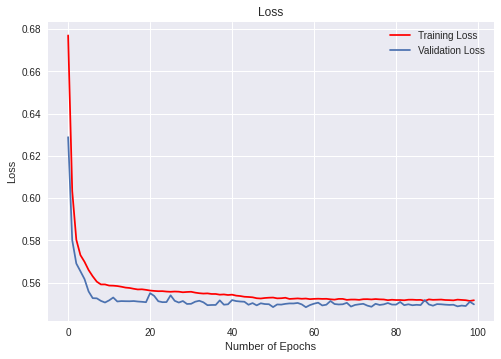

In [ ]:
# Model Loss Graph
plt.style.use("seaborn")
plt.title("Loss")
plt.plot(fit_model.history["loss"], "r", label="Training Loss")
plt.plot(fit_model.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Export our model to HDF5 file
from google.colab import files

nn_model.save('/content/Alphabet_Soup_model3.h5')
files.download('/content/Alphabet_Soup_model3.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>